In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/245_HC.png
/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/701_HC.png
/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/531_HC.png
/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/557_HC.png
/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/442_HC.png
/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/780_HC.png
/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/073_HC.png
/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/587_2HC.png
/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/364_2HC.png
/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/137_HC.png
/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-ima

In [2]:
image_folder = '/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/'

In [3]:
image_files = os.listdir(image_folder)

In [4]:
image_count = len(image_files)
print(f'Total number of images: {image_count}')

Total number of images: 999


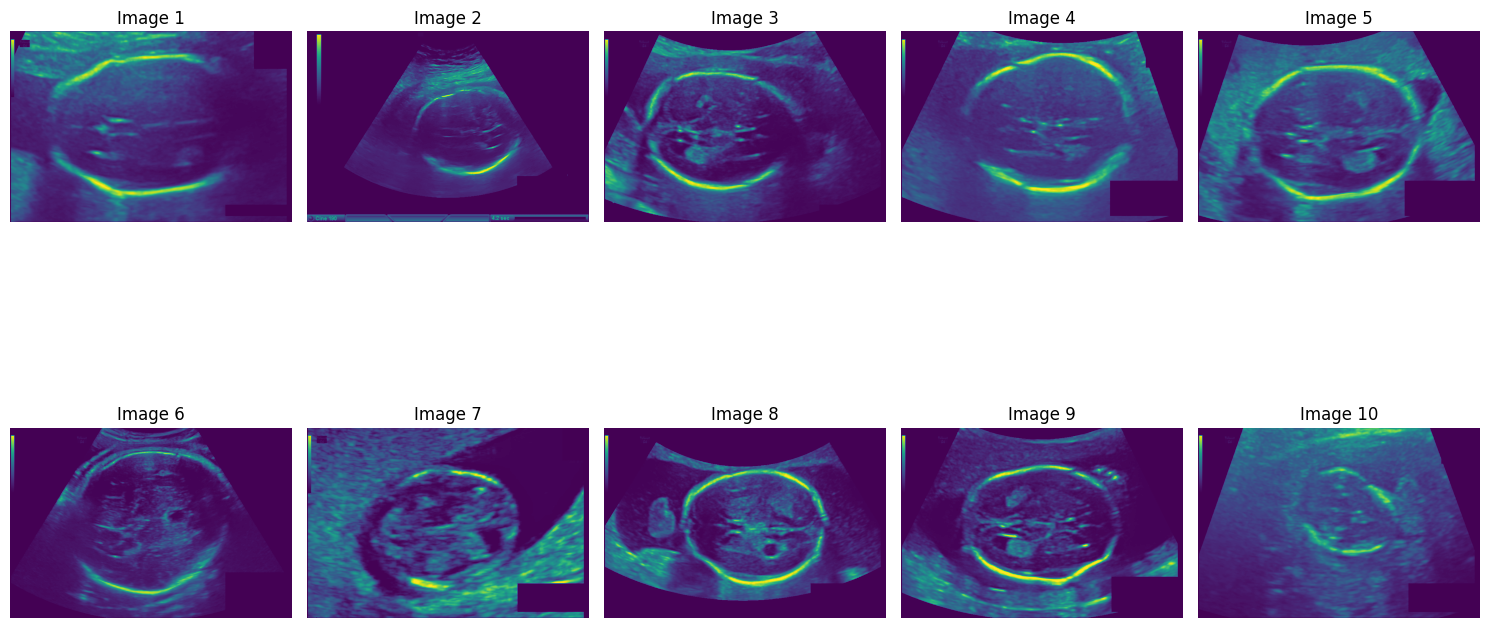

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(15, 10))

for i in range(10):
    img_path = os.path.join(image_folder, image_files[i])
    img = Image.open(img_path)

    plt.subplot(2, 5, i + 1)  
    plt.imshow(img)
    plt.axis('off') 
    plt.title(f'Image {i + 1}')

plt.tight_layout()
plt.show()

In [6]:
import cv2

In [7]:
images = []

for file in image_files:
    img_path = os.path.join(image_folder, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = cv2.resize(img, (256, 256))  
    images.append(img)

images_array = np.array(images)

In [8]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

features = base_model.predict(preprocess_input(images_array))
features_reshaped = features.reshape(features.shape[0], -1) 

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


I0000 00:00:1732175148.924382     100 service.cc:145] XLA service 0x7b1aa810b8d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732175148.924427     100 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732175148.924432     100 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 2/32 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step

I0000 00:00:1732175165.081428     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 343ms/step


In [10]:
from sklearn.cluster import KMeans

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_reshaped)

labels = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
df = pd.DataFrame({
    'image_path': image_files,
    'cluster_label': labels
})

In [12]:
df.head()

,image_path,cluster_label
0,245_HC.png,1
1,701_HC.png,0
2,531_HC.png,2
3,557_HC.png,2
4,442_HC.png,2


In [13]:
df.tail()

,image_path,cluster_label
994,237_3HC.png,2
995,315_HC.png,0
996,233_HC.png,1
997,751_HC.png,1
998,531_2HC.png,2


In [14]:
df.shape

(999, 2)

In [15]:
df.columns

Index(['image_path', 'cluster_label'], dtype='object')

In [16]:
df['cluster_label'].unique()

array([1, 0, 2], dtype=int32)

In [17]:
df['cluster_label'].value_counts()

cluster_label
1    545
2    278
0    176
Name: count, dtype: int64

/tmp/ipykernel_30/1767660870.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_clusters, 5, cluster * 5 + i + 1)


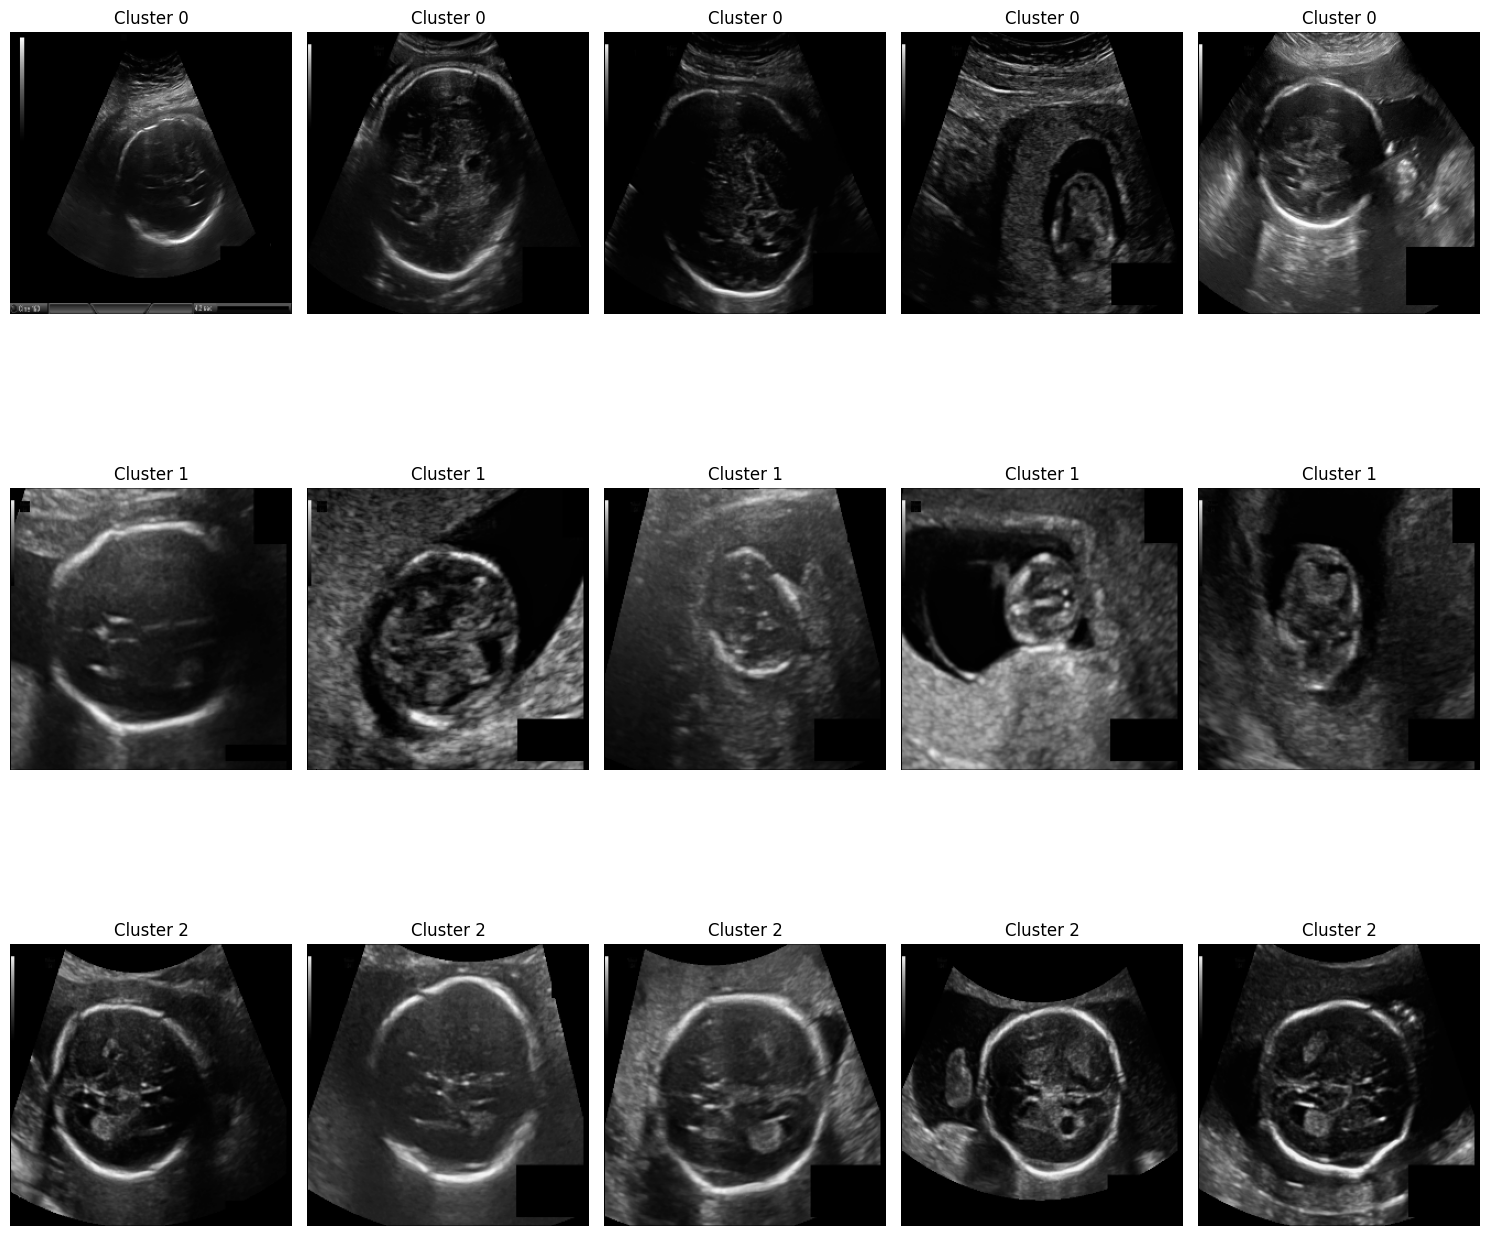

In [18]:
def plot_clustered_images(df, images_array, n_clusters):
    plt.figure(figsize=(15, 15))
    for cluster in range(n_clusters):
        plt.subplot(n_clusters, 1, cluster + 1) 
        cluster_images = df[df['cluster_label'] == cluster]  
        
        for i in range(min(len(cluster_images), 5)):  
            img_index = cluster_images.index[i] 
            plt.subplot(n_clusters, 5, cluster * 5 + i + 1)  
            plt.imshow(images_array[img_index]) 
            plt.axis('off')
            plt.title(f'Cluster {cluster}') 
        
    plt.tight_layout()
    plt.show()

plot_clustered_images(df, images_array, n_clusters)

In [19]:
df

,image_path,cluster_label
0,245_HC.png,1
1,701_HC.png,0
2,531_HC.png,2
3,557_HC.png,2
4,442_HC.png,2
...,...,...
994,237_3HC.png,2
995,315_HC.png,0
996,233_HC.png,1
997,751_HC.png,1


In [20]:
df['cluster_label'] = df['cluster_label'].astype(str)

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['cluster_label'])

In [23]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['cluster_label'] = y_resampled

In [24]:
print("\nClass distribution after oversampling:")
print(df_resampled['cluster_label'].value_counts())


Class distribution after oversampling:
cluster_label
1    545
0    545
2    545
Name: count, dtype: int64


In [25]:
df_resampled

,image_path,cluster_label
0,245_HC.png,1
1,701_HC.png,0
2,531_HC.png,2
3,557_HC.png,2
4,442_HC.png,2
...,...,...
1630,678_HC.png,2
1631,361_2HC.png,2
1632,556_HC.png,2
1633,364_2HC.png,2


In [26]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [27]:
df_resampled['cluster_label'] = df_resampled['cluster_label'].astype(str)

In [28]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['cluster_label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['cluster_label']
)

In [29]:
batch_size = 16
img_size = (224, 224)
channels = 3

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

directory = '/kaggle/input/diverese-fetal-head-images/Diverse Fetal Head Images-orginal-image/'

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    directory=directory,  
    x_col='image_path',
    y_col='cluster_label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    directory=directory,
    x_col='image_path',
    y_col='cluster_label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    directory=directory,
    x_col='image_path',
    y_col='cluster_label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 1308 validated image filenames belonging to 3 classes.
Found 163 validated image filenames belonging to 3 classes.
Found 164 validated image filenames belonging to 3 classes.


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [32]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(3, activation='softmax')) 

    return model

input_shape = (224, 224, 3)   

cnn_model = create_cnn_model(input_shape)

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

In [33]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [35]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - accuracy: 0.6612 - loss: 0.8702 - val_accuracy: 0.9448 - val_loss: 0.1532
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9353 - loss: 0.1707 - val_accuracy: 0.9571 - val_loss: 0.1299
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9699 - loss: 0.0851 - val_accuracy: 0.8834 - val_loss: 0.4515
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9846 - loss: 0.0509 - val_accuracy: 0.9448 - val_loss: 0.1282
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9870 - loss: 0.0330 - val_accuracy: 0.9632 - val_loss: 0.1161
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9955 - loss: 0.0114 - val_accuracy: 0.9755 - val_loss: 0.1321
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9264 - val_loss: 0.2808
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.9815 - loss: 0.0436 - val_accu

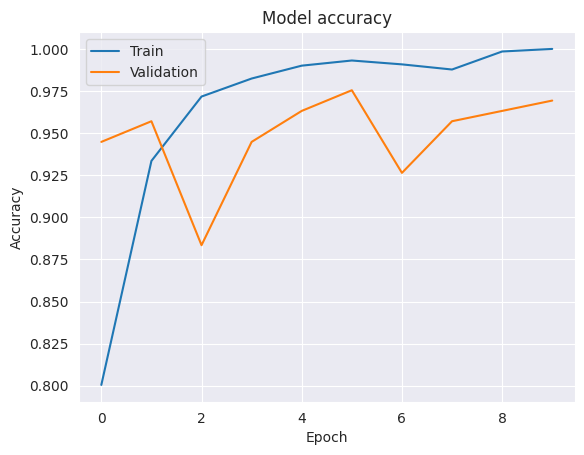

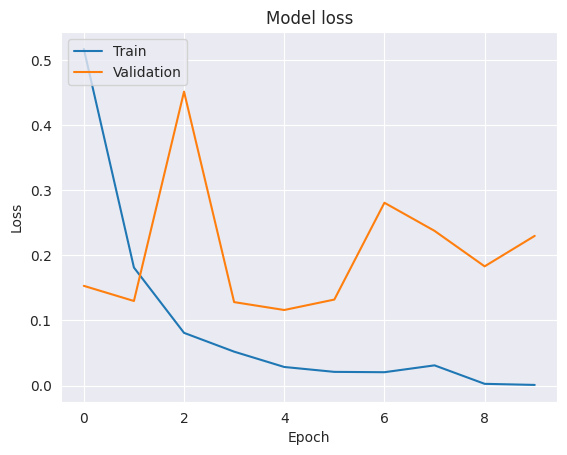

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step


In [38]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.91      0.96      0.94        55
           2       0.96      0.91      0.93        55

    accuracy                           0.96       164
   macro avg       0.96      0.96      0.96       164
weighted avg       0.96      0.96      0.96       164



In [39]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

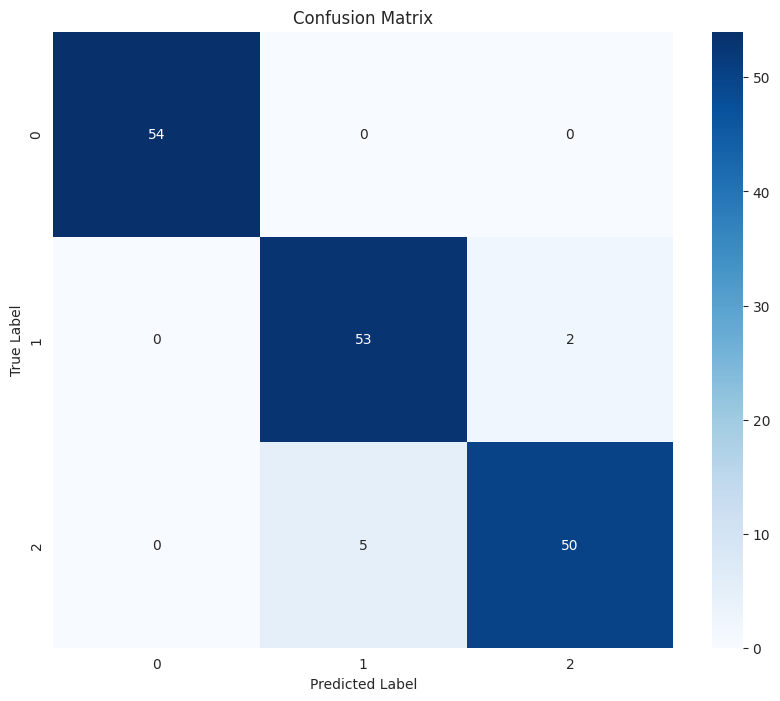

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
from tensorflow.keras.applications import InceptionV3

In [42]:
def create_inception_model(input_shape):
   
    base_model = InceptionV3(weights='imagenet', input_shape=input_shape, include_top=False)
    
   
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    
    model.add(GaussianNoise(0.25))  
    
    model.add(GlobalAveragePooling2D())  
    
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization())  
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    
    model.add(Dense(3, activation='softmax'))  

    return model

In [43]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise

In [44]:
input_shape = (224, 224, 3)  
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [45]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 51s 385ms/step - accuracy: 0.6780 - loss: 0.8141 - val_accuracy: 0.8528 - val_loss: 0.3836
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.8961 - loss: 0.3369 - val_accuracy: 0.9264 - val_loss: 0.2704
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.9178 - loss: 0.2186 - val_accuracy: 0.9509 - val_loss: 0.1974
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.9366 - loss: 0.1813 - val_accuracy: 0.9387 - val_loss: 0.1976
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.9502 - loss: 0.1344 - val_accuracy: 0.9571 - val_loss: 0.1716


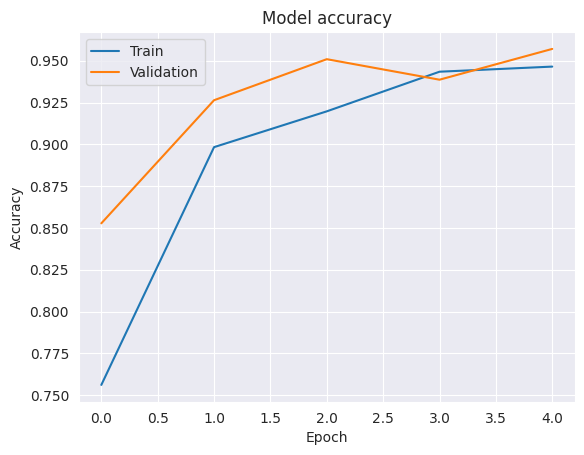

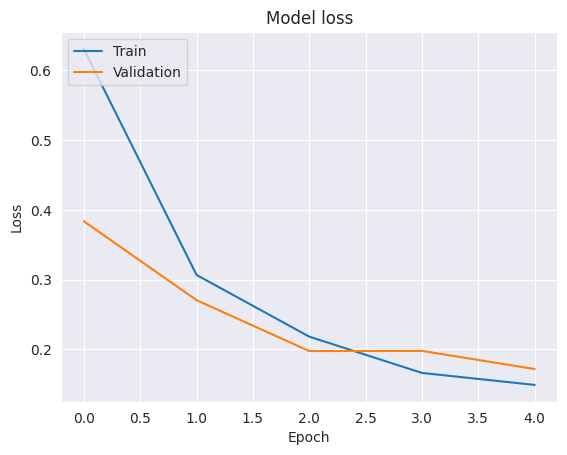

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 777ms/step


In [48]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        54
           1       0.95      0.69      0.80        55
           2       0.68      0.95      0.79        55

    accuracy                           0.82       164
   macro avg       0.86      0.82      0.83       164
weighted avg       0.86      0.82      0.83       164



In [49]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

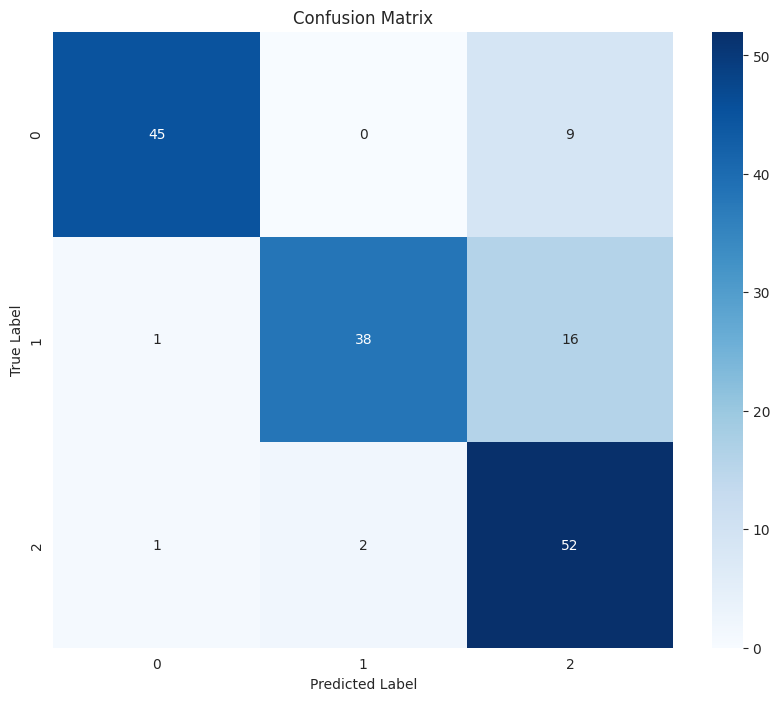

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))  
    model.add(GlobalAveragePooling2D())  
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization()) 
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    model.add(Dense(3, activation='softmax'))  

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [52]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 43s 315ms/step - accuracy: 0.6618 - loss: 0.8494 - val_accuracy: 0.8589 - val_loss: 0.5123
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.8993 - loss: 0.2807 - val_accuracy: 0.9509 - val_loss: 0.3043
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.9123 - loss: 0.2524 - val_accuracy: 0.9693 - val_loss: 0.1990
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.9437 - loss: 0.1651 - val_accuracy: 0.9571 - val_loss: 0.1751
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.9475 - loss: 0.1316 - val_accuracy: 0.9448 - val_loss: 0.1500


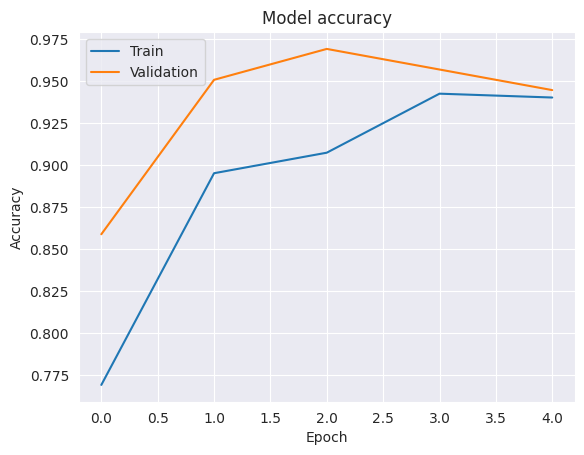

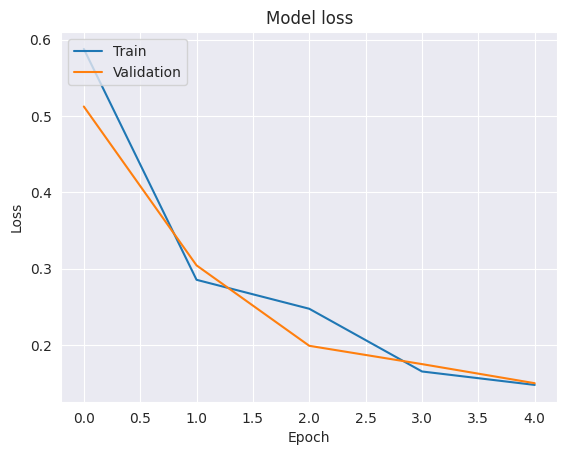

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 540ms/step


In [55]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.74      0.98      0.84        54
           1       1.00      0.62      0.76        55
           2       0.78      0.82      0.80        55

    accuracy                           0.80       164
   macro avg       0.84      0.81      0.80       164
weighted avg       0.84      0.80      0.80       164



In [56]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

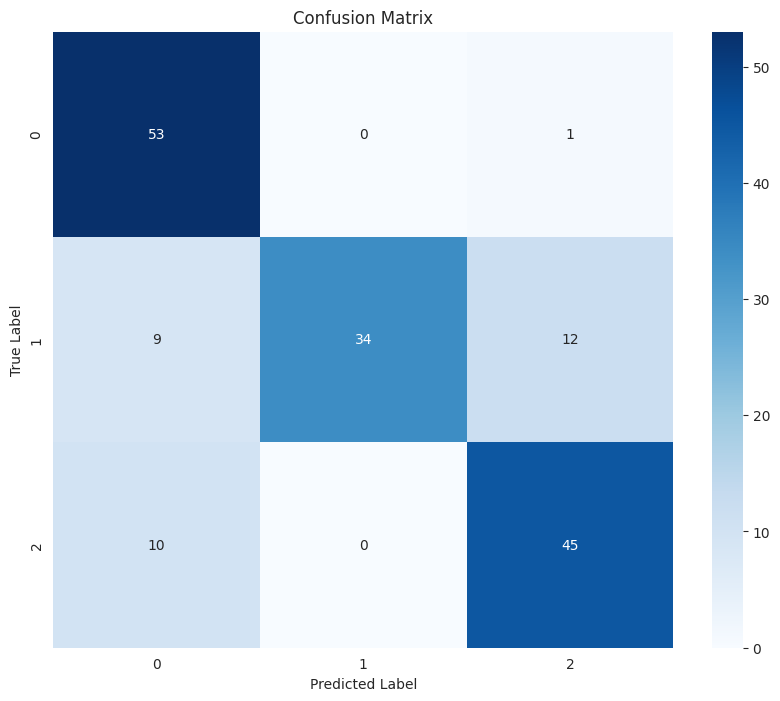

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [58]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [59]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10


I0000 00:00:1732175553.274694     582 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



37/82 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.6942 - loss: 0.7274 

I0000 00:00:1732175579.434590     612 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.7431 - loss: 0.6239

I0000 00:00:1732175608.053169     641 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



82/82 ━━━━━━━━━━━━━━━━━━━━ 74s 606ms/step - accuracy: 0.7438 - loss: 0.6224 - val_accuracy: 0.6012 - val_loss: 1.2719
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 255ms/step - accuracy: 0.8774 - loss: 0.2868 - val_accuracy: 0.7546 - val_loss: 1.1499
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 251ms/step - accuracy: 0.9013 - loss: 0.2376 - val_accuracy: 0.8650 - val_loss: 0.5080
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.9549 - loss: 0.1395 - val_accuracy: 0.9202 - val_loss: 0.2203
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 241ms/step - accuracy: 0.9530 - loss: 0.1317 - val_accuracy: 0.8834 - val_loss: 0.4060


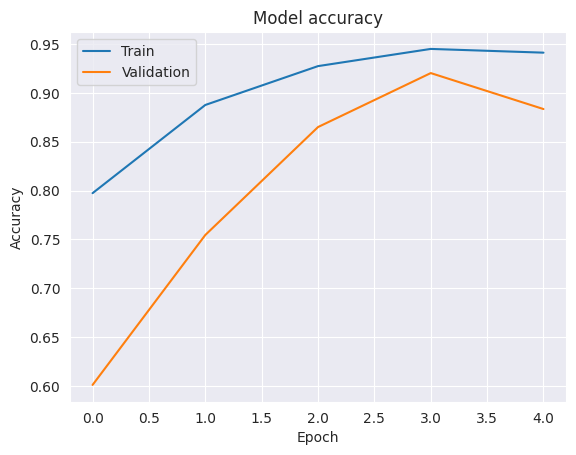

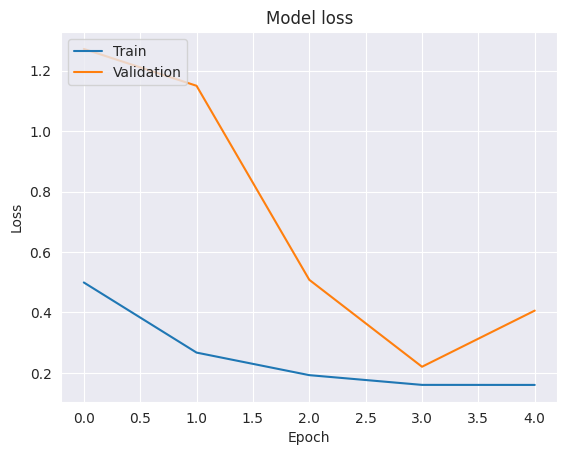

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [61]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

I0000 00:00:1732175710.180539     727 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step 


In [62]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.70      0.81        54
           1       1.00      0.29      0.45        55
           2       0.51      1.00      0.67        55

    accuracy                           0.66       164
   macro avg       0.82      0.66      0.64       164
weighted avg       0.82      0.66      0.64       164



In [63]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

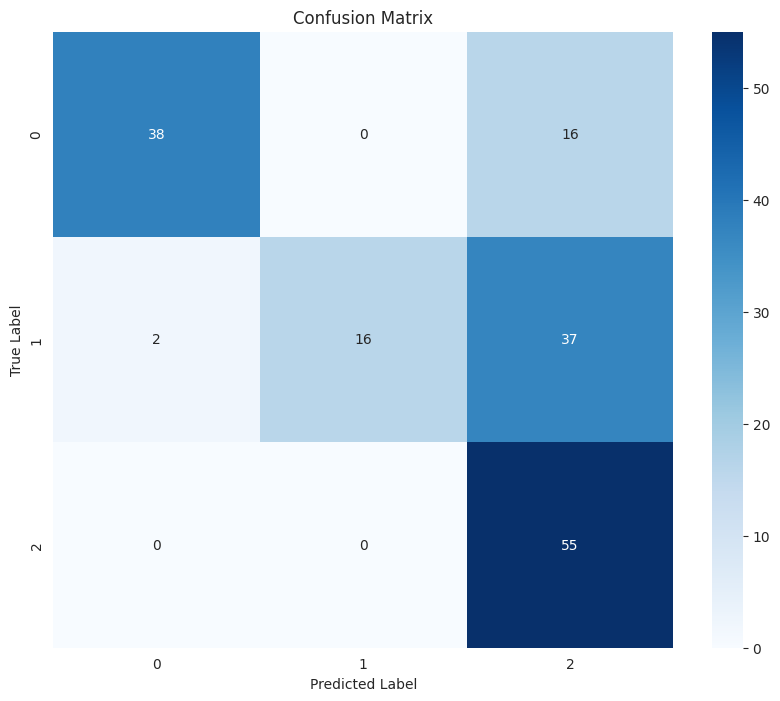

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [65]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):
    
    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x) 

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)  

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [66]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10


I0000 00:00:1732175734.492105     752 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



43/82 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.7503 - loss: 0.7431

I0000 00:00:1732175758.381377     785 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.7771 - loss: 0.6360

I0000 00:00:1732175784.177736     813 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



82/82 ━━━━━━━━━━━━━━━━━━━━ 73s 558ms/step - accuracy: 0.7777 - loss: 0.6342 - val_accuracy: 0.8650 - val_loss: 0.4143
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - accuracy: 0.9144 - loss: 0.2222 - val_accuracy: 0.9202 - val_loss: 0.3581
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.9390 - loss: 0.1432 - val_accuracy: 0.8712 - val_loss: 0.2830
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.9609 - loss: 0.1147 - val_accuracy: 0.9264 - val_loss: 0.2108
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.9783 - loss: 0.0529 - val_accuracy: 0.9632 - val_loss: 0.2130


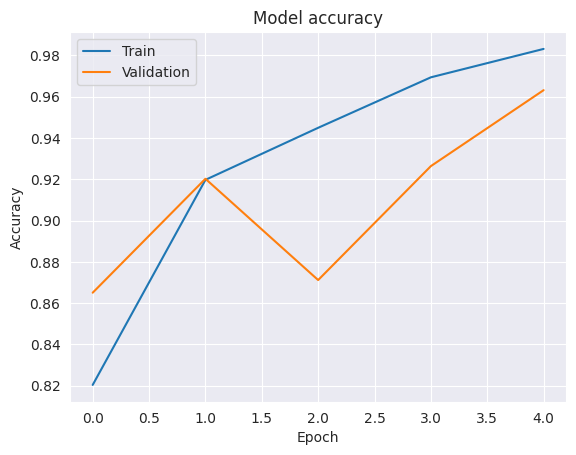

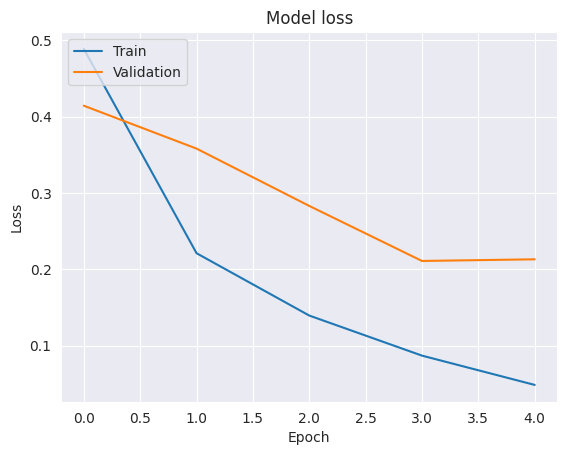

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [68]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step

I0000 00:00:1732175858.650656     897 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step 


In [69]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.81      1.00      0.89        55
           2       0.97      0.71      0.82        55

    accuracy                           0.89       164
   macro avg       0.90      0.89      0.89       164
weighted avg       0.90      0.89      0.89       164



In [70]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

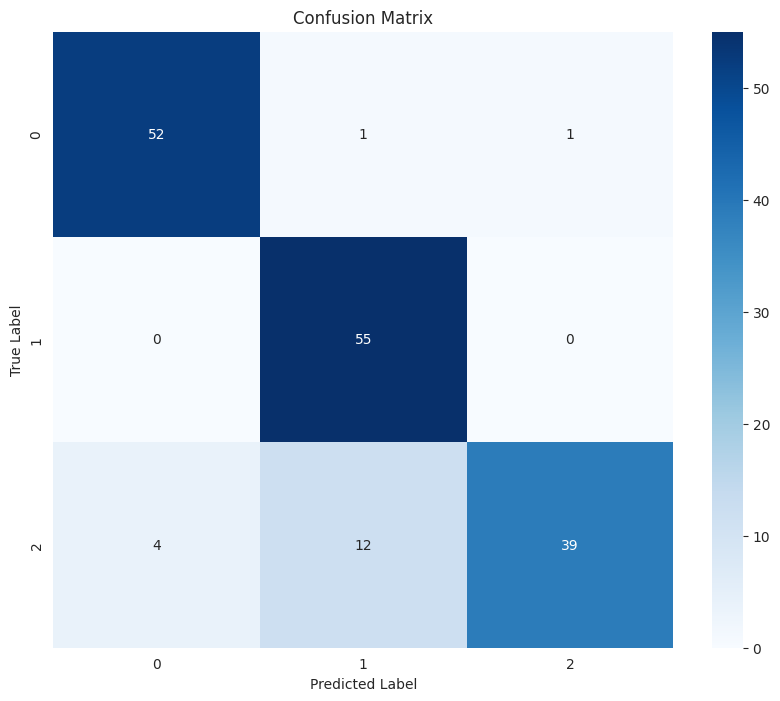

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()